In [1]:
import BioSimSpace as BSS
import MDAnalysis as mda
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

INFO:rdkit:Enabling RDKit 2023.03.3 jupyter extensions
INFO:numexpr.utils:Note: NumExpr detected 20 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [7]:
#amber 100 ns trajectories of protein-ligand
u = mda.Universe("/pascal/data/project/100ns_prod_runs/prod_100ns_amber_4000_1/amber_copy.parm7", "/pascal/data/project/100ns_prod_runs/prod_100ns_amber_4000_1/amber.nc")
u_2 =mda.Universe("/pascal/data/project/100ns_prod_runs/prod_100ns_amber_4000_2/amber_copy.parm7", "/pascal/data/project/100ns_prod_runs/prod_100ns_amber_4000_2/amber.nc")
u_3 =mda.Universe("/pascal/data/project/100ns_prod_runs/prod_100ns_amber_4000_3/amber_copy.parm7", "/pascal/data/project/100ns_prod_runs/prod_100ns_amber_4000_3/amber.nc")

#espaloma traj
u_4 = mda.Universe("/pascal/data/project/protein_ligand/prod_100ns_esp_4000/amber_copy.parm7", "/pascal/data/project/protein_ligand/prod_100ns_esp_4000/amber.nc")
u_5 = mda.Universe("/pascal/data/project/protein_ligand/prod_100ns_esp_4000_2/amber_copy.parm7", "/pascal/data/project/protein_ligand/prod_100ns_esp_4000_2/amber.nc")
u_6 = mda.Universe("/pascal/data/project/protein_ligand/prod_100ns_esp_4000_3/amber_copy.parm7", "/pascal/data/project/protein_ligand/prod_100ns_esp_4000_3/amber.nc")

In [2]:
#amber trajectories 1000 ns protein-ligand
u = mda.Universe("/pascal/data/project/prod_runs/prod_1000ns_amber_4000_1/amber_copy.parm7", "/pascal/data/project/prod_runs/prod_1000ns_amber_4000_1/amber.nc")
u_2 =mda.Universe("/pascal/data/project/prod_runs/prod_1000ns_amber_4000_2/amber_copy.parm7", "/pascal/data/project/prod_runs/prod_1000ns_amber_4000_2/amber.nc")
u_3 =mda.Universe("/pascal/data/project/prod_runs/prod_1000ns_amber_4000_3/amber_copy.parm7", "/pascal/data/project/prod_runs/prod_1000ns_amber_4000_3/amber.nc")

#espaloma traj
u_4 = mda.Universe("/pascal/data/project/protein_ligand/prod_1000ns_esp_4000/amber_copy.parm7", "/pascal/data/project/protein_ligand/prod_1000ns_esp_4000/amber.nc")
u_5 = mda.Universe("/pascal/data/project/protein_ligand/prod_1000ns_esp_4000_2/amber_copy.parm7", "/pascal/data/project/protein_ligand/prod_1000ns_esp_4000_2/amber.nc")
u_6 = mda.Universe("/pascal/data/project/protein_ligand/prod_1000ns_esp_4000_3/amber_copy.parm7", "/pascal/data/project/protein_ligand/prod_1000ns_esp_4000_3/amber.nc")

In [ ]:
#dropping first 5 % of the frames 
traj = u.trajectory
print(len(traj))
drop_frames = int(traj.n_frames * 0.05)

In [44]:
#AMBER selections (to be edited for what's needed)
#amber1
atoms1 = u.select_atoms('resid 1:12 and not name H*')
atoms2 = u.select_atoms('name CA and resid 13:306')


num_frames = len(u.trajectory[drop_frames:])
distances_over_frames = np.zeros((num_frames, len(atoms1), len(atoms2)))

#amber2
atoms1_2 = u_2.select_atoms('resid 1:12 and not name H*')
atoms2_2 = u_2.select_atoms('name CA and resid 13:306')


num_frames_2 = len(u_2.trajectory[drop_frames:])
distances_over_frames_2 = np.zeros((num_frames_2, len(atoms1_2), len(atoms2_2)))

#amber3
atoms1_3 = u_3.select_atoms('resid 1:12 and not name H*')
atoms2_3 = u_3.select_atoms('name CA and resid 13:306')


num_frames_3 = len(u_3.trajectory[drop_frames:])
distances_over_frames_3 = np.zeros((num_frames_3, len(atoms1_3), len(atoms2_3)))

In [37]:
#ESPALOMA SELECTIONS
#espaloma1
atoms1 = u_4.select_atoms('index 0:92')
atoms2 = u_4.select_atoms('name CA and resid 2:295')


num_frames = len(u_4.trajectory[drop_frames:])
distances_over_frames = np.zeros((num_frames, len(atoms1), len(atoms2)))

#espaloma2
atoms1_2 = u_5.select_atoms('index 0:92')
atoms2_2 = u_5.select_atoms('name CA and resid 2:295')


num_frames_2 = len(u_5.trajectory[drop_frames:])
distances_over_frames_2 = np.zeros((num_frames_2, len(atoms1_2), len(atoms2_2)))

#espaloma3
atoms1_3 = u_6.select_atoms('index 0:92')
atoms2_3 = u_6.select_atoms('name CA and resid 2:295')


num_frames_3 = len(u_6.trajectory[drop_frames:])
distances_over_frames_3 = np.zeros((num_frames_3, len(atoms1_3), len(atoms2_3)))

In [45]:
#use for either amber or espaloma, one at a time (edit u_n)
for idx, ts in enumerate(u.trajectory[drop_frames:]):
    #pairwise distances
    distances = np.linalg.norm(atoms1.positions[:, np.newaxis, :] - atoms2.positions[np.newaxis, :, :], axis=-1)
    
    #storing distances
    distances_over_frames[idx] = distances

#mean distances over all frames
mean_distances = np.mean(distances_over_frames, axis=0)

for idx_2, ts_2 in enumerate(u_2.trajectory[drop_frames:]):
    distances_2 = np.linalg.norm(atoms1_2.positions[:, np.newaxis, :] - atoms2_2.positions[np.newaxis, :, :], axis=-1)
    distances_over_frames_2[idx_2] = distances_2

mean_distances_2 = np.mean(distances_over_frames_2, axis=0)


for idx_3, ts_3 in enumerate(u_3.trajectory[drop_frames:]):
    distances_3 = np.linalg.norm(atoms1_3.positions[:, np.newaxis, :] - atoms2_3.positions[np.newaxis, :, :], axis=-1)
    distances_over_frames_3[idx_3] = distances_3

mean_distances_3 = np.mean(distances_over_frames_3, axis=0)

In [46]:
print(mean_distances.shape)
print(mean_distances_2.shape)
print(mean_distances_3.shape)

(45, 15)
(45, 15)
(45, 15)


In [47]:
mean_distances

array([[16.21858265, 17.34664663, 16.2050423 , 18.07334936, 19.43207883,
        19.18705302, 21.77019634, 21.37125466, 22.23484452, 23.88789291,
        22.18084462, 19.26362025, 16.87128462, 14.48604134, 13.68120731],
       [17.46509654, 18.46991966, 16.98990762, 18.51254512, 19.47315392,
        18.90036461, 21.38254417, 20.67777589, 21.5049883 , 23.32046692,
        21.66983918, 18.69070139, 16.62804345, 14.41331923, 14.40449952],
       [17.86455616, 19.25866124, 18.05836693, 19.4671768 , 20.33939993,
        19.44969976, 21.72668053, 20.84263391, 21.9220907 , 23.97006952,
        22.51234837, 19.45848316, 17.59066537, 15.18563947, 15.06040173],
       [17.93820676, 18.53406448, 16.65745115, 17.75964863, 18.42197409,
        17.71580652, 20.20492166, 19.49886973, 20.28306456, 22.09761314,
        20.52332935, 17.50377959, 15.51935618, 13.37240058, 14.14447578],
       [17.43684668, 17.88796748, 16.02194101, 16.94532711, 17.66624061,
        16.98551084, 19.50642522, 19.04060485, 

In [48]:
# mean over all trajs
stacked_arrays = np.stack([mean_distances, mean_distances_2, mean_distances_3], axis=0)
mean_distances_combined = np.mean(stacked_arrays, axis=0)
print(mean_distances_combined.shape)

(45, 15)


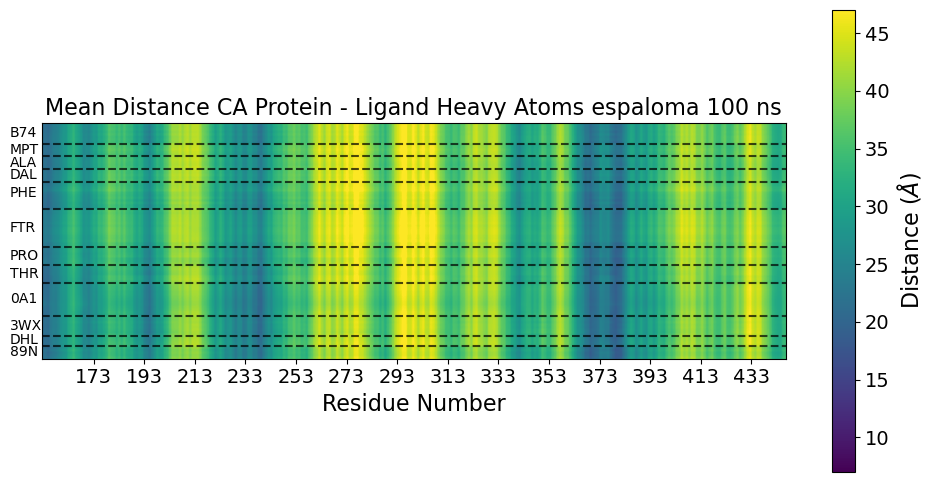

In [43]:
#plotting the results as heat map

fig, ax = plt.subplots(figsize=(12,6))
im = ax.imshow(mean_distances_combined, origin='upper', vmin=7, vmax=47)



tick_interval = 1
x_labels = [i+153 for i in range(mean_distances.shape[1])]
x_tick_positions = np.arange(20, len(x_labels), 20)
plt.xticks(x_tick_positions, [x_labels[i] for i in x_tick_positions])


#plt.axhline(y=5.5, color="black", linestyle='--', alpha=0.7)
#plt.axhline(y=16.5, color="black", linestyle='--', alpha=0.7)
#plt.axhline(y=31.5, color="black", linestyle='--', alpha=0.7)
#plt.axhline(y=38.5, color="black", linestyle='--', alpha=0.7)

plt.axhline(y=7.5, color="black", linestyle='--', alpha=0.7)
plt.axhline(y=12.5, color="black", linestyle='--', alpha=0.7)
plt.axhline(y=17.5, color="black", linestyle='--', alpha=0.7)
plt.axhline(y=22.5, color="black", linestyle='--', alpha=0.7)
plt.axhline(y=33.5, color="black", linestyle='--', alpha=0.7)
plt.axhline(y=48.5, color="black", linestyle='--', alpha=0.7)
plt.axhline(y=55.5, color="black", linestyle='--', alpha=0.7)
plt.axhline(y=62.5, color="black", linestyle='--', alpha=0.7)
plt.axhline(y=75.5, color="black", linestyle='--', alpha=0.7)
plt.axhline(y=83.5, color="black", linestyle='--', alpha=0.7)
plt.axhline(y=87.5, color="black", linestyle='--', alpha=0.7)


#plt.text(-5,2.5, 'DAL', va='center', ha='center', color='black')
#plt.text(-5, 11, 'PHE',  va='center', ha='center', color='black')
#plt.text(-5,23.5, 'FTR', va='center', ha='center', color='black')
#plt.text(-5,35.5,  'PRO', va='center', ha='center', color='black')
#plt.text(-5,42.4,  'THR', va='center', ha='center', color='black')

plt.text(-13, 3.5, 'B74',  va='center', ha='left', color='black', fontsize=10)
plt.text(-13, 10, 'MPT',  va='center', ha='left', color='black', fontsize=10)
plt.text(-13, 15,  'ALA',  va='center', ha='left', color='black', fontsize=10)
plt.text(-13, 20, 'DAL',  va='center', ha='left', color='black', fontsize=10)
plt.text(-13, 27, 'PHE',  va='center', ha='left', color='black', fontsize=10)
plt.text(-13, 41,  'FTR',  va='center', ha='left', color='black', fontsize=10)
plt.text(-13, 52,  'PRO',  va='center', ha='left', color='black', fontsize=10)
plt.text(-13, 59,  'THR',  va='center', ha='left', color='black', fontsize=10)
plt.text(-13, 69, '0A1',  va='center', ha='left', color='black', fontsize=10)
plt.text(-13, 79.5,  '3WX',  va='center', ha='left', color='black', fontsize=10)
plt.text(-13, 85,  'DHL',  va='center', ha='left', color='black', fontsize=10)
plt.text(-13, 89.75,  '89N',  va='center', ha='left', color='black', fontsize=10)
plt.yticks([])



plt.title('Mean Distance CA Protein - Ligand Heavy Atoms espaloma 100 ns', fontsize=16)
plt.xlabel("Residue Number")
cbar = fig.colorbar(im)
cbar.ax.set_ylabel('Distance ($\AA$)')
plt.savefig("plots_newamber/Distances/espaloma_100")